<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Nino-3.4-index" data-toc-modified-id="Nino-3.4-index-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Nino 3.4 index</a></span><ul class="toc-item"><li><span><a href="#Climatology:-1986-2015-30-year" data-toc-modified-id="Climatology:-1986-2015-30-year-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Climatology: 1986-2015 30 year</a></span><ul class="toc-item"><li><span><a href="#Extract-anomaly" data-toc-modified-id="Extract-anomaly-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Extract anomaly</a></span></li><li><span><a href="#Calculate-index:-running-mean" data-toc-modified-id="Calculate-index:-running-mean-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Calculate index: running mean</a></span></li></ul></li><li><span><a href="#Visualize-the-Nino-3.4" data-toc-modified-id="Visualize-the-Nino-3.4-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualize the Nino 3.4</a></span></li><li><span><a href="#An-enclosed-function:-1-step" data-toc-modified-id="An-enclosed-function:-1-step-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>An enclosed function: 1 step</a></span></li></ul></li><li><span><a href="#Earth's-energy-budget" data-toc-modified-id="Earth's-energy-budget-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Earth's energy budget</a></span><ul class="toc-item"><li><span><a href="#Make-a-2D-plot" data-toc-modified-id="Make-a-2D-plot-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Make a 2D plot</a></span></li><li><span><a href="#Calculate-and-verify" data-toc-modified-id="Calculate-and-verify-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Calculate and verify</a></span></li><li><span><a href="#Calculate-and-plot" data-toc-modified-id="Calculate-and-plot-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Calculate and plot</a></span></li><li><span><a href="#Calculate-and-plot" data-toc-modified-id="Calculate-and-plot-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Calculate and plot</a></span></li><li><span><a href="#Calculate" data-toc-modified-id="Calculate-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Calculate</a></span></li></ul></li><li><span><a href="#Explore-a-netCDF-dataset" data-toc-modified-id="Explore-a-netCDF-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore a netCDF dataset</a></span><ul class="toc-item"><li><span><a href="#Boreal-winter-months-(Nov.-Apr.)-precipitation-anomalies" data-toc-modified-id="Boreal-winter-months-(Nov.-Apr.)-precipitation-anomalies-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Boreal winter months (Nov.-Apr.) precipitation anomalies</a></span></li><li><span><a href="#Boreal-summer-months-(May-Oct.)-precipitation-anomalies" data-toc-modified-id="Boreal-summer-months-(May-Oct.)-precipitation-anomalies-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Boreal summer months (May-Oct.) precipitation anomalies</a></span></li><li><span><a href="#Boreal-winter-99th-percentile-precipitation" data-toc-modified-id="Boreal-winter-99th-percentile-precipitation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Boreal winter 99th percentile precipitation</a></span></li><li><span><a href="#Boreal-summer-99th-percentile-precipitation" data-toc-modified-id="Boreal-summer-99th-percentile-precipitation-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Boreal summer 99th percentile precipitation</a></span></li></ul></li></ul></div>

In [249]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs

# Nino 3.4 index

In [2]:
sst_file = xr.open_dataset('Data/NOAA_NCDC_ERSST_v3b_SST.nc')
sst_file

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [3]:
sst = sst_file.sst

## Climatology: 1986-2015 30 year

In [4]:
sst_30clim = sst.groupby(sst.time.dt.month).mean()

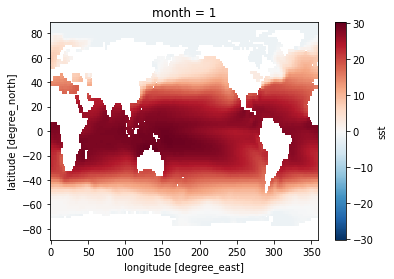

In [5]:
sst_30clim[0].plot()

### Extract anomaly

In [43]:
def get_anom(data,data_clim):
    data_anom=xr.DataArray(
    np.zeros(data.shape),
    [('time',data.time),('lat',data.lat),('lon',data.lon)])

    for i in range(len(data)):
        data_anom[i]=data[i]-data_clim.where((data_clim.month.isin(data[i].time.dt.month))
                                      ,drop=True).squeeze().values
    return data_anom

In [226]:
sst_anom=get_anom(sst,sst_30clim)

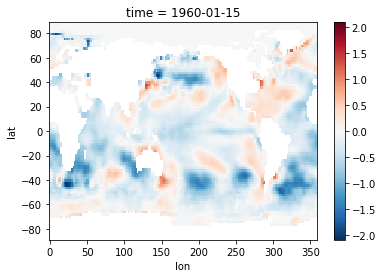

In [227]:
sst_anom[0].plot()

In [10]:
# Select the Niño 3.4 region
# Niño 3.4 (5N-5S, 170W-120W)
region34_anom = sst_anom.sel(time=slice('2000','2016')).sel(lat=slice(-5.5,4.5),lon=slice(190.5,240.5))
region34_anom_mean = np.mean(region34_anom,axis=(1,2))

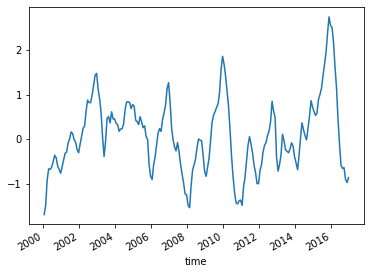

In [11]:
region34_anom_mean.plot()

In [12]:
# Smooth the anomalies with a 3-month running mean
nstep = len(region34_anom)-3
index_oni = xr.DataArray(
    np.zeros(nstep),[('time',region34_anom.time[:-3])])
for i in range(0,nstep):
    index_oni[i] = np.mean(region34_anom[i:i+3])

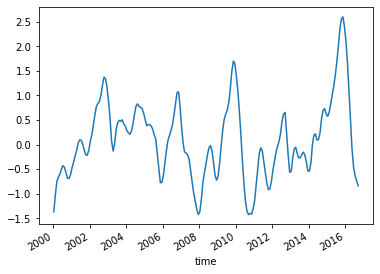

In [13]:
index_oni.plot()

### Calculate index: running mean

In [14]:
# Mark the El Nino events and La Nina events
# The ONI uses a 3-month running mean, and to be classified as a full-fledged El Niño or La Niña
# The anomalies must exceed +0.5C or -0.5C for at least five consecutive months. 
# This is the operational definition used by NOAA.https://origin.cpc.ncep.noaa.gov/

# Normalize the smoothed values by its standard deviation over the period.
n_index_oni = index_oni / np.std(index_oni)

El_index = np.zeros(len(n_index_oni))
La_index = np.zeros(len(n_index_oni))
for i in range(len(index_oni-5)):
    if (n_index_oni[i:i+5]>0.5).all() == True:
        El_index[i:i+5] = n_index_oni[i:i+5]
    if (n_index_oni[i:i+5]<-0.5).all() == True:
        La_index[i:i+5] = n_index_oni[i:i+5]

In [15]:
El_index.shape,La_index.shape

((201,), (201,))

## Visualize the Nino 3.4

In [16]:
def enso_plot(n_index_oni,El_index,La_index):
    xtime = n_index_oni.time.values

    fig, ax = plt.subplots(figsize=(14,8))

    ax.plot(xtime,n_index_oni,'k')
    ax.tick_params(axis='both',labelsize=13)
    ax.set_ylim(-3.5,3.5)
    ax.set_xlabel('Time (year)',fontsize=13)
    ax.set_ylabel('ONI (std.)',fontsize=13)
    ax.set_title('Oceanic Niño Index (ONI)',fontsize=15)
    ax.grid()

    # Mark the El Nino events and La Nina events        
    fil1 = ax.fill_between(xtime,0,El_index,color='r',alpha=0.4)
    fil2 = ax.fill_between(xtime,0,La_index,color='cyan',alpha=0.4)
    # Add legend
    ax.legend([fil1,fil2],['El Nino','La Nina'],fontsize=16)
    plt.show()
    return fig,ax

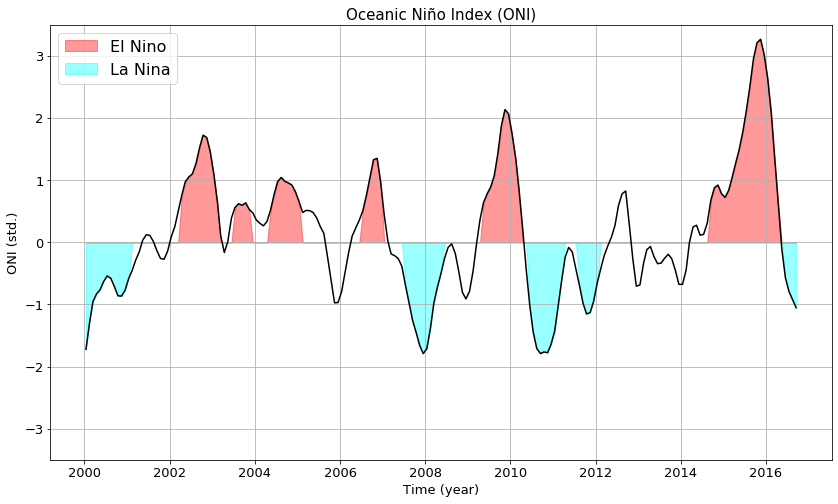

(<Figure size 1008x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8fb837ef10>)

In [17]:
enso_plot(n_index_oni,El_index,La_index)

## An enclosed function: 1 step

In [18]:
def oni_index_plot(sst):
    #Step1. 30 year climatology mean
    sst_30clim = sst.groupby(sst.time.dt.month).mean()
    
    #Step2. sst anomalies
    sst_anom=get_anom(sst)
    
    #Step3. Select the Niño 3.4 region (5N-5S, 170W-120W)
    region34_anom = sst_anom.sel(time=slice('2000','2016')).sel(lat=slice(-5.5,4.5),lon=slice(190.5,240.5))
    region34_anom_mean = np.mean(region34_anom,axis=(1,2))
    
    #Step4. Smooth the anomalies with a 3-month running mean
    nstep = len(region34_anom)-3
    index_oni = xr.DataArray(
    np.zeros(nstep),[('time',region34_anom.time[:-3])])
    for i in range(0,nstep):
        index_oni[i] = np.mean(region34_anom[i:i+3])
        
    #Step 5 Mark the El Nino events and La Nina events
    n_index_oni = index_oni / np.std(index_oni)

    El_index = np.zeros(len(n_index_oni))
    La_index = np.zeros(len(n_index_oni))
    
    for i in range(len(index_oni-5)):
        if (n_index_oni[i:i+5]>0.5).all() == True:
            El_index[i:i+5] = n_index_oni[i:i+5]
        if (n_index_oni[i:i+5]<-0.5).all() == True:
            La_index[i:i+5] = n_index_oni[i:i+5]
    fig,ax=enso_plot(n_index_oni,El_index,La_index)
    return fig,ax

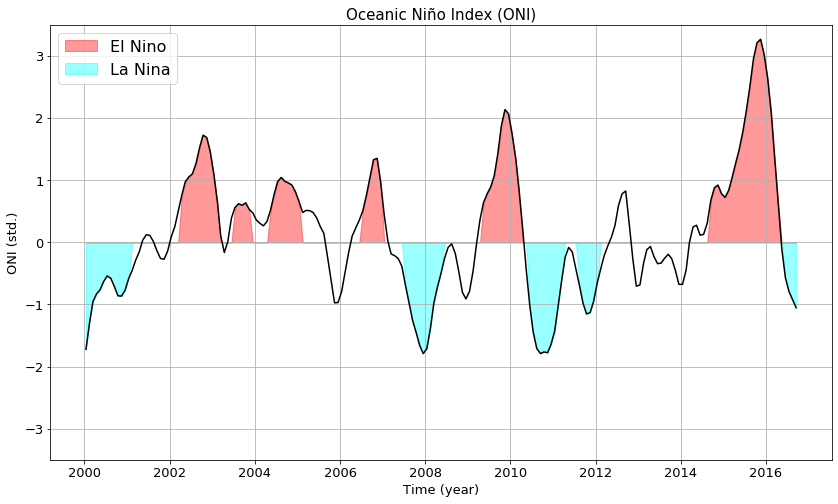

(<Figure size 1008x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8fb830a690>)

In [20]:
oni_index_plot(sst)

# Earth's energy budget

In [2]:
ds = xr.open_dataset('Data/CERES_EBAF-TOA_200003-201701.nc')
ds

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables:
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    toa_cre_sw_mon               (time, lat, lon) float32 ...
    toa_cre_lw_mon               (time, lat, lon) float32 ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

## Make a 2D plot 
1. time-mean TOA longwave
2. shortwave
3. solar radiation for all-sky conditions.
4. Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux.

In [3]:
plt_data=[ds.toa_sw_all_mon.mean(dim='time'),
     ds.toa_lw_all_mon.mean(dim='time'),
     ds.toa_net_all_mon.mean(dim='time'),
     ds.solar_mon.mean(dim='time'),]
labels=['TOA shortwave radiation','TOA longwave radiation',
       'TOA net radiation','Solar radiation']

**TOA net radiation = Solar radiation - (TOA shortwave_out + TOA longwave_out)** 

Text(0.5, 1.0, 'Verification')

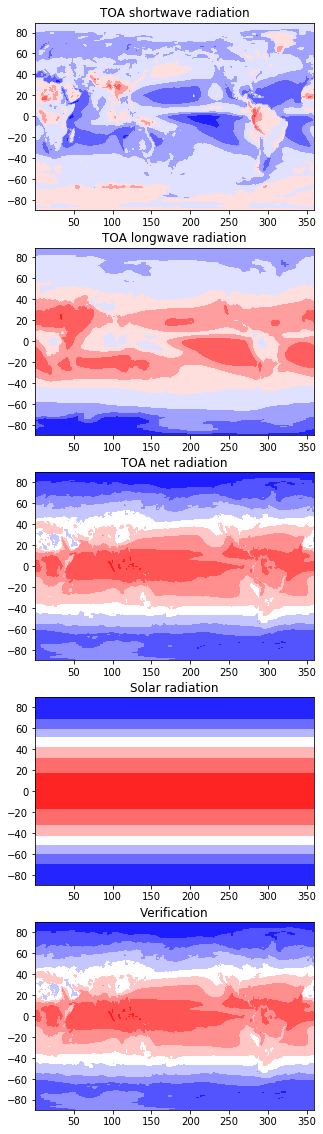

In [61]:
fig,axs=plt.subplots(5,1,figsize=(5,20))
lon=plt_data[0].lon
lat=plt_data[0].lat

for data,ax,label in zip(plt_data[:4],axs[:4],labels[:4]):
    ax.contourf(lon,lat,data,cmap='bwr',)
    ax.set_title(label)
axs[4].contourf(lon,lat,plt_data[3]-(plt_data[0]+plt_data[1]),cmap='bwr')
axs[4].set_title('Verification')

## Calculate and verify
The TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above.

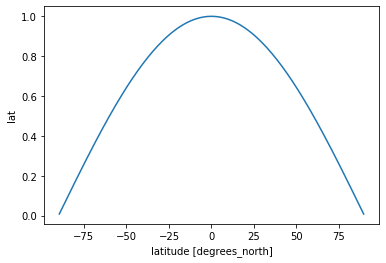

In [4]:
weights=np.cos(np.deg2rad(ds.lat))
weights.plot()

In [6]:
data_list=[ds.solar_mon,ds.toa_sw_all_mon,ds.toa_lw_all_mon]

In [12]:
list(map(lambda data: data.sel(time=slice('2006','2016')).weighted(weights).mean(), data_list))

[<xarray.DataArray ()>
 array(340.29804625),
 <xarray.DataArray ()>
 array(99.00475716),
 <xarray.DataArray ()>
 array(240.26727502)]

1. TOA incoming solar radiation: $340.4 W m^2$ in cartoon  
2. TOA outgoing shortwave radiation : $99.9 W m^2$   
3. TOA outgoing longwave radiation is $240.3 W m^2$, close to $239.9 W m^2$ in cartoon  

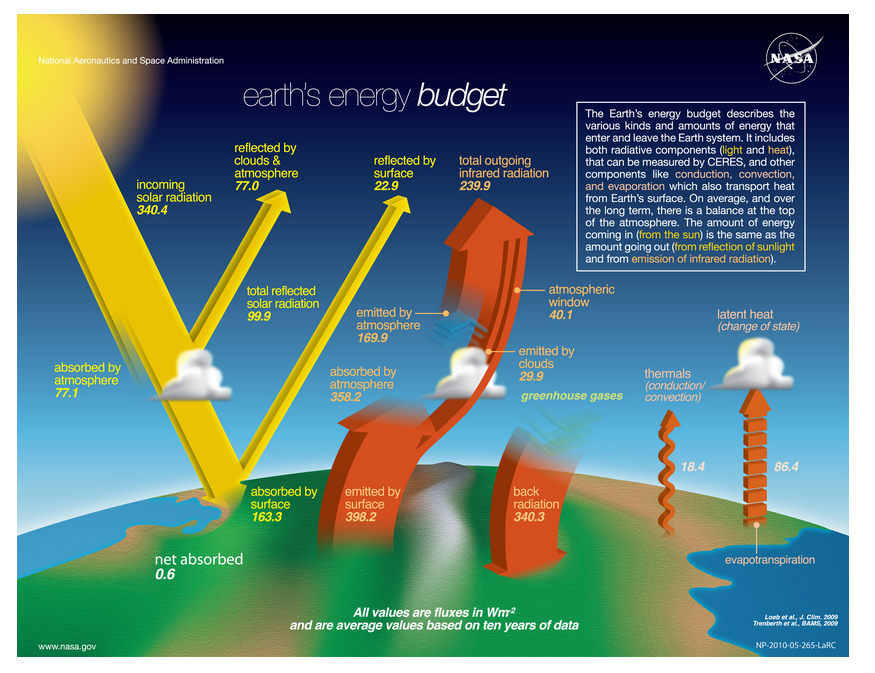

## Calculate and plot
Total amount of net radiation in each 1-degree latitude band. Label with correct units.

In [14]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

Text(0.5, 0, 'Latitude')

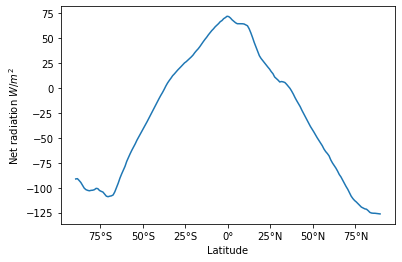

In [21]:
fig,ax=plt.subplots()
ax.plot(ds.lat,ds.toa_net_all_mon.weighted(weights).mean(dim=['time','lon']))
ax.set_ylabel('Net radiation $W/m^2$')
ax.xaxis.set_major_formatter(LatitudeFormatter())
ax.set_xlabel('Latitude')

## Calculate and plot
Composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions. Here we define low cloud area as ≤25% and high cloud area as ≥75%. Your results should be 2D maps.

In [16]:
cloud_frac=ds.cldarea_total_daynight_mon
low_cloud=cloud_frac.where(cloud_frac<= 25)
high_cloud=cloud_frac.where(cloud_frac>=75)

In [17]:
low_cloud_mask=xr.where(np.isnan(low_cloud)==False,1,0)
high_cloud_mask=xr.where(np.isnan(high_cloud)==False,1,0)

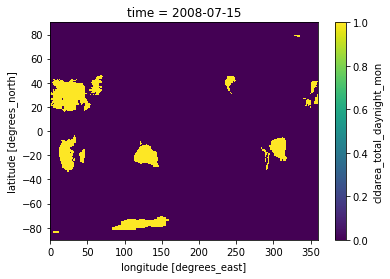

In [194]:
low_cloud_mask[100].plot()

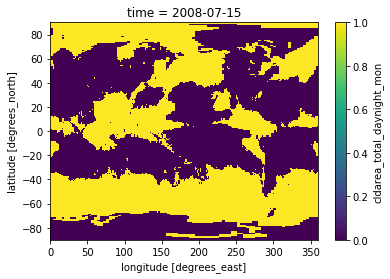

In [195]:
high_cloud_mask[100].plot()

In [18]:
low_cloud_sw=ds.toa_sw_all_mon*low_cloud_mask
low_cloud_lw=ds.toa_lw_all_mon*low_cloud_mask

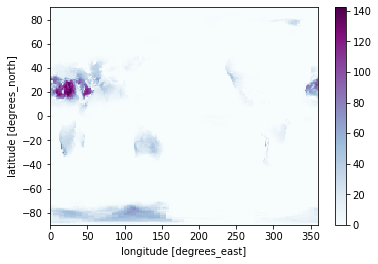

In [208]:
low_cloud_sw.mean(dim='time').plot(cmap='BuPu')

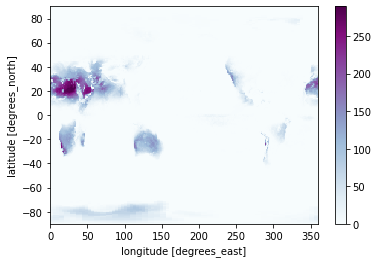

In [214]:
low_cloud_lw.mean(dim='time').plot(cmap='BuPu')

In [19]:
high_cloud_sw=ds.toa_sw_all_mon*high_cloud_mask
high_cloud_lw=ds.toa_lw_all_mon*high_cloud_mask

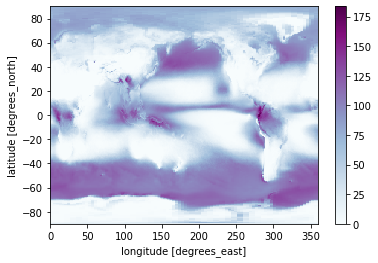

In [211]:
high_cloud_sw.mean(dim='time').plot(cmap='BuPu')

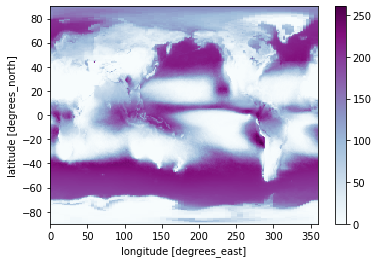

In [212]:
high_cloud_lw.mean(dim='time').plot(cmap='BuPu')

## Calculate 
The global mean values of shortwave and longwave radiation, composited in high and low cloud regions. 

What is the overall effect of clouds on shortwave and longwave radiation?

1. Clouds reflect more shortwave radiation. 
2. Part of longwave radiation is diretly emitted by clouds.   
3. Regions with high cloud cover possibly emit more latent heat and contributes to the outgoing longwave radiation. 


In [23]:
print('Low cloud area global mean shortwave radiation %.2f W/m^2'%low_cloud_sw.weighted(weights).mean())
print('Low cloud area global mean longwave radiation %.2f W/m^2'%low_cloud_lw.weighted(weights).mean())
print('High cloud area global mean shortwave radiation %.2f W/m^2'%high_cloud_sw.weighted(weights).mean())
print('High cloud area global mean longwave radiation %.2f W/m^2'%high_cloud_lw.weighted(weights).mean())

Low cloud area global mean shortwave radiation 3.97 W/m^2
Low cloud area global mean longwave radiation 12.19 W/m^2
High cloud area global mean shortwave radiation 48.82 W/m^2
High cloud area global mean longwave radiation 96.13 W/m^2


# Explore a netCDF dataset

**Dataset:** CESM CMIP6 Experiment CESM2_amip-4xCO2_r1i1p1f1  
**case name:** f.e21.FHIST_BGC.f09_f09_mg17.CFMIP-amip-4xCO2.001  
**description:** the same as the amip experiment within DECK, except that the CO2 concentration seen by the radiation scheme is quadrupled. AMIP SSTs with 4xCO2  
**more information:** https://csegweb.cgd.ucar.edu/experiments/public/

File download path
http://esgf-data.ucar.edu/thredds/fileServer/esg_dataroot/CMIP6/CFMIP/NCAR/CESM2/amip-4xCO2/r1i1p1f1/Amon/pr/gn/v20190408/pr_Amon_CESM2_amip-4xCO2_r1i1p1f1_gn_197901-201412.nc

In [40]:
cesm_pr=xr.open_dataset('Data/pr_Amon_CESM2_amip-4xCO2_r1i1p1f1_gn_197901-201412.nc')

/home/andrea/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


In [41]:
pr=cesm_pr.pr
pr

<xarray.DataArray 'pr' (time: 432, lat: 192, lon: 288)>
[23887872 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1979-01-15 12:00:00 ... 2014-12-15 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        chunits( ((1000 * PRECT)), units="kg m-2 s-1")
    description:    at surface; includes both liquid and solid phases from al...
    frequency:      mon
    id:             pr
    long_name:      Precipitation
    mipTable:       Amon
    out_name:       pr
    prov:           Amon ((isd.003))
    realm:          atmos
    standard_name:  precipitation_flux
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Precipitation
    type:           real
    units:          kg m-2 s-1
    variable_id:    pr

In [42]:
pr_clim_sel=pr.sel(time=slice('1979','1998'))
pr_clim_30y=pr_clim_sel.groupby(pr_clim_sel.time.dt.month).mean()

In [52]:
pr_anom=get_anom(pr,pr_clim_30y)*24*3600

In [267]:
def plot_map():
    proj = ccrs.PlateCarree(central_longitude=180)
    fig,ax = plt.subplots(figsize=(8,8),subplot_kw=dict(projection=proj))
 
    ax.set_xticks([0,60,120,180,240,300,360],crs=ccrs.PlateCarree())
    ax.set_yticks([-90,-60,-30,0,30,60,90],crs=ccrs.PlateCarree())
    
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    
    ax.coastlines(zorder=10,lw=0.5)
    return fig,ax

## Boreal winter months (Nov.-Apr.) precipitation anomalies

Text(0.5, 1.0, 'Historical precipitation anomaly during boreal winter')

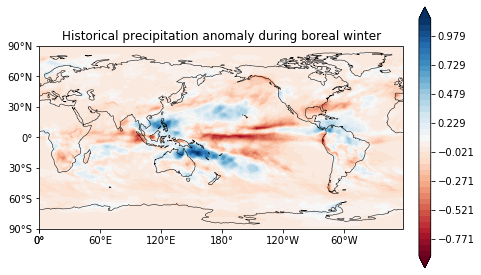

In [303]:
fig,ax=plot_map()
plt_data=pr_anom.where(pr_anom.time.dt.month.isin([1,2,3,4,11,12])).mean(dim='time')
clevs=np.arange(plt_data.min(),plt_data.max(),0.05)
cf=plt.contourf(plt_data.lon,plt_data.lat,plt_data,clevs,cmap='RdBu',extend='both',transform=ccrs.PlateCarree())
plt.colorbar(cf,shrink=0.6,pad=0.035)
plt.title('Historical precipitation anomaly during boreal winter')

## Boreal summer months (May-Oct.) precipitation anomalies

Text(0.5, 1.0, 'Historical precipitation anomaly during boreal summer')

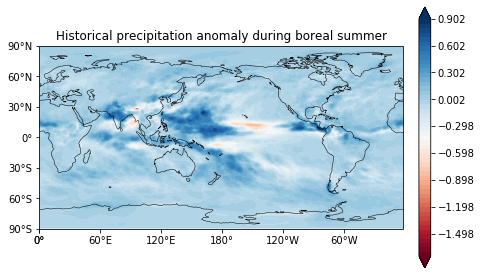

In [304]:
fig,ax=plot_map()
plt_data=pr_anom.where(pr_anom.time.dt.month.isin([5,6,7,8,9,10])).mean(dim='time')
clevs=np.arange(plt_data.min(),plt_data.max(),0.05)
cf=plt.contourf(plt_data.lon,plt_data.lat,plt_data,clevs,cmap='RdBu',extend='both',transform=ccrs.PlateCarree())
plt.colorbar(cf,shrink=0.6,pad=0.035)
plt.title('Historical precipitation anomaly during boreal summer')

## Boreal winter 99th percentile precipitation 

In [305]:
plt_data=xr.DataArray(
    np.percentile(pr_anom.where((pr_anom.time.dt.month.isin([1,2,3,4,11,12])),drop=True),99,axis=0),
    [('lat',pr_anom.lat),('lon',pr_anom.lon)]
)

Text(0.5, 1.0, 'Historical precipitation anomaly during boreal winter')

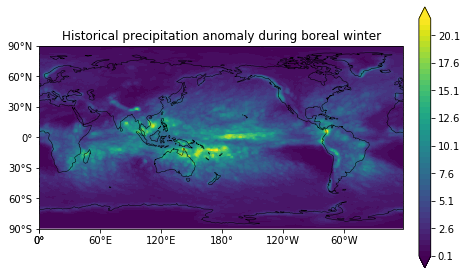

In [308]:
fig,ax=plot_map()
clevs=np.arange(plt_data.min(),plt_data.max(),.5)
cf=plt.contourf(plt_data.lon,plt_data.lat,plt_data,clevs,extend='both',transform=ccrs.PlateCarree())
plt.colorbar(cf,shrink=0.6,pad=0.035)
plt.title('Historical precipitation anomaly during boreal winter')

Text(-10, 130, 'Boreal winter 99th precipitation')

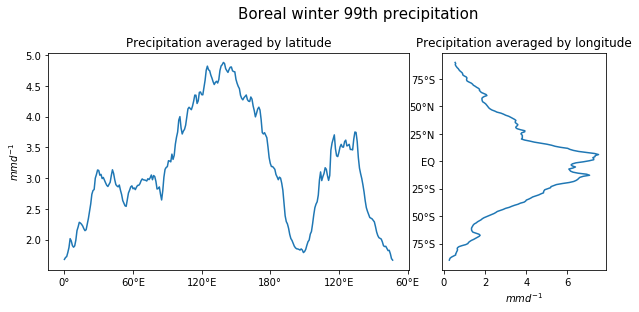

In [301]:
fig = plt.figure(figsize=(10,4))
grid = plt.GridSpec(2, 3)
# Plot each axes
               
plt.subplot(grid[:,:2])
plt.plot(plt_data.mean(dim=['lat'])) 
plt.xticks([0,60,120,180,240,300],labels=x_tick_labels)
plt.title('Precipitation averaged by latitude')
plt.ylabel('$mm d^{-1}$')

plt.subplot(grid[:,2])
plt.plot(plt_data.mean(dim=['lon']),plt_data.lat)
plt.yticks([-75,-50,-25,0,25,50,75],labels=y_tick_labels)
plt.title('Precipitation averaged by longitude')
plt.xlabel('$mm d^{-1}$')

plt.text(-10,130,'Boreal winter 99th precipitation',fontsize=15)

## Boreal summer 99th percentile precipitation

In [309]:
plt_data=xr.DataArray(
    np.percentile(pr_anom.where((pr_anom.time.dt.month.isin([5,6,7,8,9,10])),drop=True),99,axis=0),
    [('lat',pr_anom.lat),('lon',pr_anom.lon)]
)

Text(0.5, 1.0, 'Historical precipitation anomaly during boreal summer')

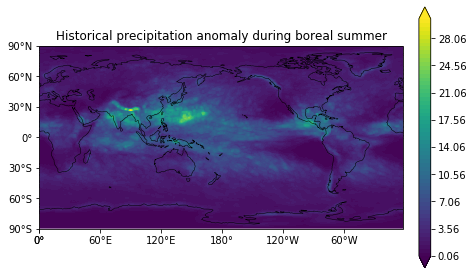

In [310]:
fig,ax=plot_map()
clevs=np.arange(plt_data.min(),plt_data.max(),.5)
cf=plt.contourf(plt_data.lon,plt_data.lat,plt_data,clevs,extend='both',transform=ccrs.PlateCarree())
plt.colorbar(cf,shrink=0.6,pad=0.035)
plt.title('Historical precipitation anomaly during boreal summer')

Text(-10, 130, 'Boreal summer 99th precipitation')

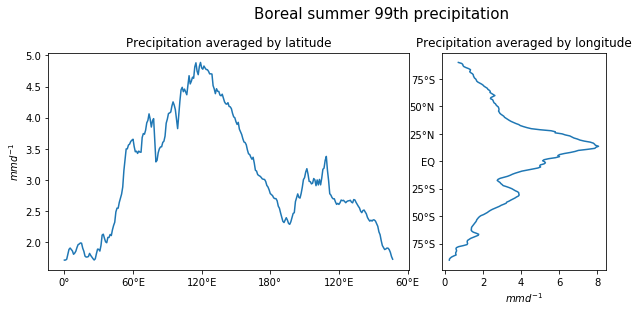

In [312]:
fig = plt.figure(figsize=(10,4))
grid = plt.GridSpec(2, 3)
# Plot each axes
               
plt.subplot(grid[:,:2])
plt.plot(plt_data.mean(dim=['lat'])) 
plt.xticks([0,60,120,180,240,300],labels=x_tick_labels)
plt.title('Precipitation averaged by latitude')
plt.ylabel('$mm d^{-1}$')

plt.subplot(grid[:,2])
plt.plot(plt_data.mean(dim=['lon']),plt_data.lat)
plt.yticks([-75,-50,-25,0,25,50,75],labels=y_tick_labels)
plt.title('Precipitation averaged by longitude')
plt.xlabel('$mm d^{-1}$')

plt.text(-10,130,'Boreal summer 99th precipitation',fontsize=15)